## Importing the required modules 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


#### Adding the year column 

In [3]:
year = []
month = []
for i in df.values:
    year.append(i[2].split('-')[0])
    month.append(int(i[2].split('-')[1]))
df['year'] = year
df['month'] = month

In [4]:
df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
year                                       0
month                                      0
dtype: int64

In [6]:
df['total_vaccination'] = df['total_vaccinations'].fillna(df['total_vaccinations'].mean())
df['people_vaccinated'] = df['people_vaccinated'].fillna(df['people_vaccinated'].mean())
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(df['people_fully_vaccinated'].mean())
df['daily_vaccinations_raw'] = df['daily_vaccinations_raw'].fillna(df['daily_vaccinations_raw'].mean())
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(df['daily_vaccinations'].mean())
df['total_vaccinations_per_hundred'] = df['total_vaccinations_per_hundred'].fillna(df['total_vaccinations_per_hundred'].mean())
df['people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].fillna(df['people_vaccinated_per_hundred'].mean())
df['people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].fillna(df['people_fully_vaccinated_per_hundred'].mean())
df['daily_vaccinations_per_million'] = df['daily_vaccinations_per_million'].fillna(df['daily_vaccinations_per_million'].mean())

## 1) Finding the monthly number of total vaccinations in 2021

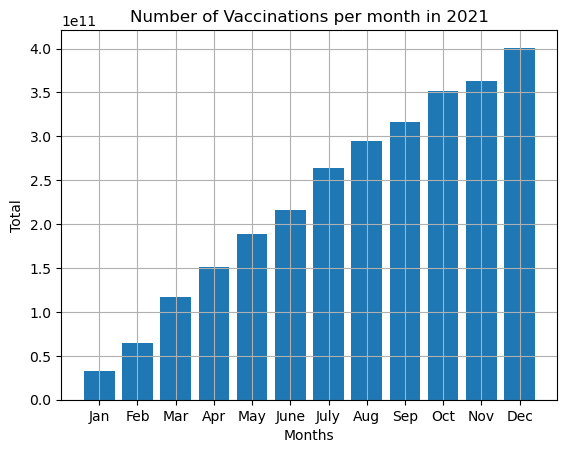

In [14]:
temp = df[df['year']=='2021']
total = []
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for i in range(1,13):
    sum = 0 
    for j in temp.values:
        if j[16]==i:
            sum+=j[3]
    total.append(round(sum,0))

plt.bar(months,total)
plt.title('Number of Vaccinations per month in 2021')
plt.xlabel('Months')
plt.ylabel('Total')
plt.grid(True)
plt.show()